# Megaline

This report will analyse with one of the prepaid telecom plans is more profitable in order to adjust the advertising budget. It will assess the usage of each plan, the monthly profit of each plan and if this monthly profit could be affected by external factors like location.

### Table of contents:

 - [General Information](#Info)
 
         General Information about the dataset
      
 - [Data Reprocessing](#Data)
 
         Preparing the data for analysis
      
 - [Analysing Data](#Ana)
 
         Use of data analysis methods to examine the data
     
 - [Hypothesis Testing](#Hyp)
 
         Test the statistical significance of the data
     
 - [Final Conclusion](#Con)
 
         Final conclusion that will assess the most profitable prepaid plan

## General Information <a class="anchor" id="Info"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from scipy import stats as st
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')
display(calls, internet, messages,plans,users)
display(calls.describe(), internet.describe(), messages.describe(),plans.describe(),users.describe())
print(calls.info(),internet.info(), messages.info(),plans.info(),users.info())


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (tot

### Conclusion

After reading the different files via the read_csv method I called the describe() method to se the statistical summary of each data set. I also used the info() method to see the data type of each column. In this user_id should be changed from an interger to an object.


## Data Reprocessing <a class="anchor" id="Data"></a>

In [2]:
num_m = messages.groupby('user_id')['message_date'].count()
plans= plans.rename(columns={'plan_name':'plan'})
def use(df,column, s):
    a = df.pivot_table(index=[column], values= [s], aggfunc='sum')
    return a 
ca_s = use(calls,'user_id', 'duration')
in_s = use(internet,'user_id', 'mb_used')

df_final = ca_s.merge(in_s, on='user_id').merge(users, on='user_id').merge(plans,on='plan').merge(num_m, on='user_id')
df_final = df_final.rename(columns={'message_date' : 'no_of_messages'})
df_final

,user_id,duration,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,no_of_messages
0,1000,116.83,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,11
1,1006,64.11,34187.19,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,154
2,1008,1473.31,55473.04,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,84
3,1011,2744.87,131778.60,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,371
4,1013,203.37,20113.92,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1489,1569.54,60995.75,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",2018-05-24,surf,NaN,50,15360,500,20,10,0.03,0.03,320
389,1491,3333.51,63050.67,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,50,15360,500,20,10,0.03,0.03,409
390,1492,1003.46,40823.96,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN,50,15360,500,20,10,0.03,0.03,108
391,1494,2672.66,91389.19,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN,50,15360,500,20,10,0.03,0.03,174


### Conclusion
Here I merged all the different files together with each user by using the merge() method. I made sure to sum the total duration of calls, the internet usage and total messages for each user in a month.


In [3]:

df_final['user_id'] = df_final['user_id'].astype(object)
df_final.info()

sur = df_final[df_final['plan']== 'surf']
ult = df_final[df_final['plan']=='ultimate']
def use(plans, cat, li):
    lims = plans[cat] - plans[li]
    return lims
g = (use(sur,'mb_per_month_included','mb_used')/1025)/2
e = use(sur,'messages_included','no_of_messages')
f = use(sur,'minutes_included','duration')

h = (use(ult,'mb_per_month_included','mb_used')/1025)/2
i = use(ult,'messages_included','no_of_messages')
j = use(ult,'minutes_included','duration')

def extra(column):
    s=0
    if column<0:
        s=abs(column* 0.03)
    else:
        pass
    return s

callss= f.apply(extra)
messs = e.apply(extra)

def extras(column):
    s=0
    if column<0:
        s=abs(column* 0.01)
    else:
        pass
    return s
callsu = h.apply(extras)
messu =  i.apply(extras)

def extrasi(column):
    s=0
    if column<0:
        s=abs(column* 10)
    else:
        pass
    return s
        
inters = g.apply(extrasi)
def extrasiu(column):
    s=0
    if column<0:
        s=abs(column* 7)
    else:
        pass
    return s
interu =  h.apply(extrasiu)

total_s= callss + messs + inters + 20
total_u = callsu + messu + interu + 70

sur = pd.merge(sur, total_s.rename('monthly_profit_usd'), left_index=True,right_index=True )
ult = pd.merge(ult, total_u.rename('monthly_profit_usd'), left_index=True,right_index=True )

display(sur,ult)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 18 columns):
user_id                  393 non-null object
duration                 393 non-null float64
mb_used                  393 non-null float64
first_name               393 non-null object
last_name                393 non-null object
age                      393 non-null int64
city                     393 non-null object
reg_date                 393 non-null object
plan                     393 non-null object
churn_date               25 non-null object
messages_included        393 non-null int64
mb_per_month_included    393 non-null int64
minutes_included         393 non-null int64
usd_monthly_pay          393 non-null int64
usd_per_gb               393 non-null int64
usd_per_message          393 non-null float64
usd_per_minute           393 non-null float64
no_of_messages           393 non-null int64
dtypes: float64(4), int64(7), object(7)
memory usage: 58.3+ KB


,user_id,duration,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,no_of_messages,monthly_profit_usd
131,1001,1640.46,80437.94,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,207,376.377166
132,1002,777.13,40293.33,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,50,15360,500,20,10,0.03,0.03,88,151.079900
133,1003,1041.00,27044.14,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,50,15360,500,20,10,0.03,0.03,50,93.225805
134,1004,2618.95,156352.81,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,50,15360,500,20,10,0.03,0.03,177,775.148305
135,1005,470.22,17140.17,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN,50,15360,500,20,10,0.03,0.03,11,28.683756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1489,1569.54,60995.75,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",2018-05-24,surf,NaN,50,15360,500,20,10,0.03,0.03,320,282.799615
389,1491,3333.51,63050.67,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,50,15360,500,20,10,0.03,0.03,409,348.412715
390,1492,1003.46,40823.96,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN,50,15360,500,20,10,0.03,0.03,108,161.058239
391,1494,2672.66,91389.19,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN,50,15360,500,20,10,0.03,0.03,174,459.773898


,user_id,duration,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,no_of_messages,monthly_profit_usd
0,1000,116.83,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,11,70.000000
1,1006,64.11,34187.19,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,154,81.856098
2,1008,1473.31,55473.04,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,84,154.643322
3,1011,2744.87,131778.60,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,371,415.571115
4,1013,203.37,20113.92,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,16,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1477,635.80,55610.93,Magaly,Rivas,52,"Riverside-San Bernardino-Ontario, CA MSA",2018-08-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,3,155.114839
127,1478,1701.68,82690.64,Elane,David,51,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-28,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,60,247.714237
128,1482,786.62,20806.13,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,94,70.000000
129,1487,392.71,13992.39,Elton,Simpson,18,"Cape Coral-Fort Myers, FL MSA",2018-08-16,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,66,70.000000


### Conclusion
To find the monthly profit required the seperation of the dataset into the the different plans. Then to calculate the extra costs of usage I found the difference of each category on each plan and the using a function multiplied this by the cost of going over the package limit. This was the added to the intial cost of the package and using the merged() method, is merged into the dataset of each plan. I also used the astype() method  to change the user_id data type to object.

## Analysing the Data <a class="anchor" id="Ana"></a>

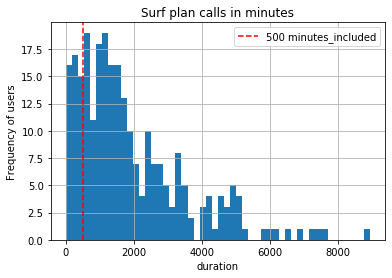

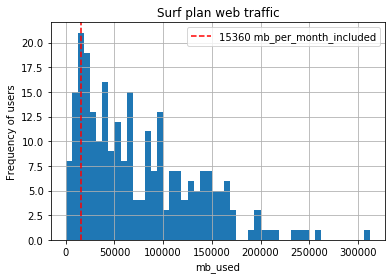

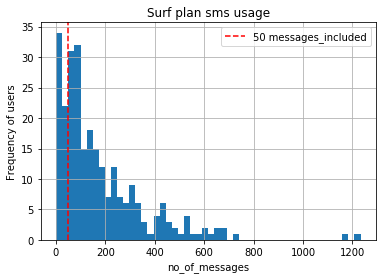

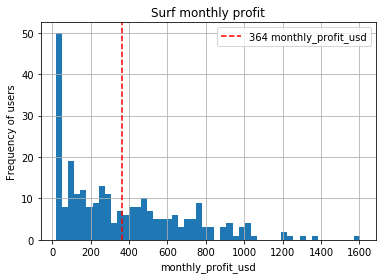

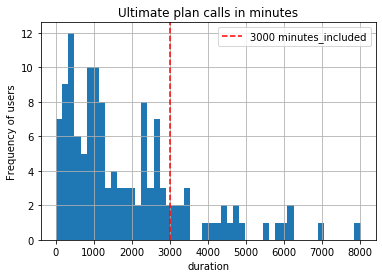

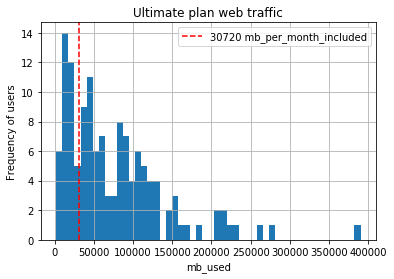

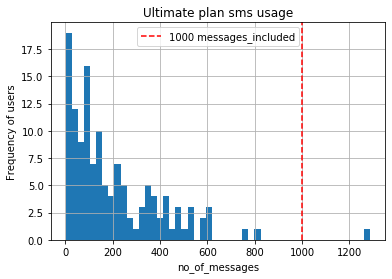

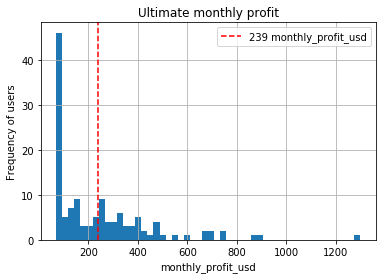

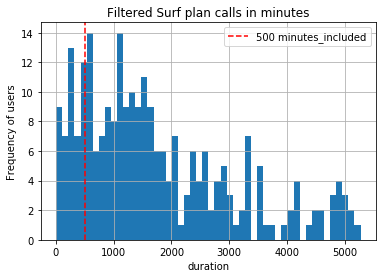

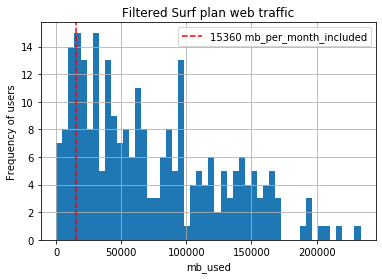

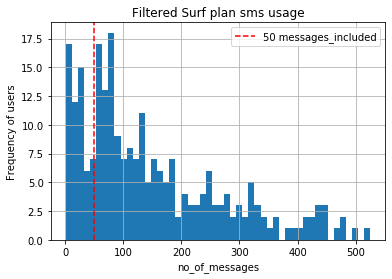

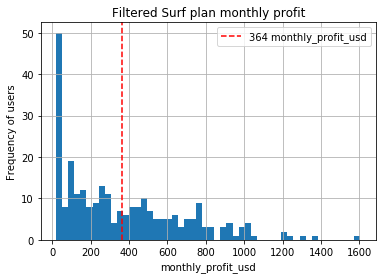

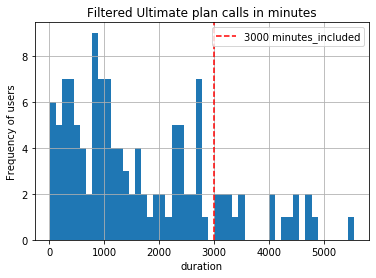

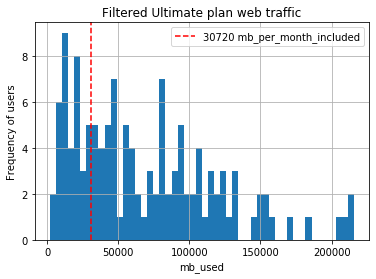

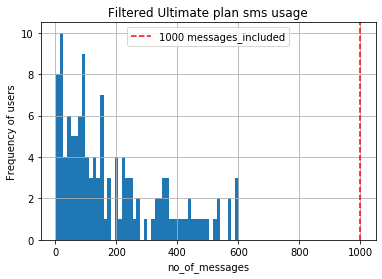

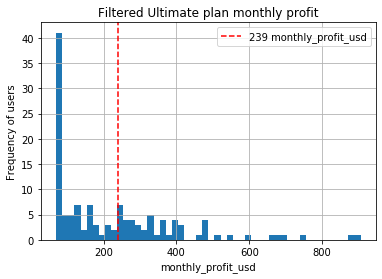

In [4]:
def histo_gram(df,types,typess, name):
    limit = df.iloc[0][typess]
    df.hist(types,bins=50)
    plt.axvline(x=limit,color='r', linestyle='--', label = '{} {}'.format(int(limit), typess))
    plt.title(name.capitalize())
    plt.ylabel("Frequency of users")
    plt.xlabel("{}".format(types))
    plt.legend()
    plt.show()
    
def profit(df,types,typess,name): 
    limit = df[typess].mean()
    df.hist(types,bins=50)
    plt.axvline(x=limit,color='r', linestyle='--', label = '{} {}'.format(int(limit), typess))
    plt.title(name.capitalize())
    plt.ylabel("Frequency of users")
    plt.xlabel("{}".format(types))
    plt.legend()
    plt.show()
    
histo_gram(sur,'duration', 'minutes_included','Surf plan calls in minutes')
histo_gram(sur,'mb_used', 'mb_per_month_included','Surf plan web traffic')
histo_gram(sur,'no_of_messages', 'messages_included','Surf plan SMS usage')
profit(sur,'monthly_profit_usd','monthly_profit_usd', 'Surf monthly profit')

histo_gram(ult,'duration', 'minutes_included','Ultimate plan calls in minutes')
histo_gram(ult,'mb_used', 'mb_per_month_included','Ultimate plan web traffic')
histo_gram(ult,'no_of_messages', 'messages_included','Ultimate plan SMS usage')
profit(ult,'monthly_profit_usd','monthly_profit_usd', 'Ultimate monthly profit')

def filt(df,data):
    Q1= df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3- Q1
    return IQR,Q3,Q1
IQRS1,Q3S1,Q1S1=filt(sur, 'duration')
IQRS2,Q3S2,Q1S2=filt(sur, 'mb_used')
IQRS3,Q3S3,Q1S3=filt(sur,'no_of_messages')
IQRS4,Q3S4,Q1S4= filt(sur,'monthly_profit_usd')

IQRU1,Q3U1,Q1U1=filt(ult,'duration')
IQRU2,Q3U2,Q1U2=filt(ult,'mb_used')
IQRU3,Q3U3,Q1U3=filt(ult,'no_of_messages')
IQRU4,Q3U4,Q1U4=filt(ult, 'monthly_profit_usd')

filteredsc = sur.query('(@Q1S1 - 1.5 * @IQRS1) <= duration <= (@Q3S1 + 1.5 * @IQRS1)')
filteredsi= sur.query('(@Q1S2 - 1.5 * @IQRS2) <= mb_used <= (@Q3S2 + 1.5 * @IQRS2)')
filteredsm = sur.query('(@Q1S3 - 1.5 * @IQRS3) <= no_of_messages <= (@Q3S3 + 1.5 * @IQRS3)')
filteredsmu = sur.query('(@Q1S4 - 1.5 * @IQRS4) <= no_of_messages <= (@Q3S4 + 1.5 * @IQRS4)')

filtereduc = ult.query('(@Q1U1 - 1.5 * @IQRU1) <= duration <= (@Q3U1 + 1.5 * @IQRU1)')
filteredui = ult.query('(@Q1U2 - 1.5 * @IQRU2) <= mb_used <= (@Q3U2 + 1.5 * @IQRU2)')
filteredum = ult.query('(@Q1U3 - 1.5 * @IQRU3) <= no_of_messages <= (@Q3U3 + 1.5 * @IQRU3)')
filteredumu = ult.query('(@Q1U4 - 1.5 * @IQRU4) <= no_of_messages <= (@Q3U4 + 1.5 * @IQRU4)')

def filt_histo_gram(df,variable,types,typess,name):
    variable.hist(types,bins=50)
    limit = df.iloc[0][typess]
    plt.axvline(x=limit,color='r', linestyle='--', label = '{} {}'.format(limit, typess))
    plt.legend()
    plt.title('Filtered ' + name.capitalize())
    plt.ylabel("Frequency of users")
    plt.xlabel("{}".format(types))
    plt.show()

def filt_profit(df,variable,types,typess,name):
    variable.hist(types,bins=50)
    limit = df[typess].mean()
    plt.axvline(x=limit,color='r', linestyle='--', label = '{} {}'.format(int(limit), typess))
    plt.legend()
    plt.title('Filtered ' + name.capitalize())
    plt.ylabel("Frequency of users")
    plt.xlabel("{}".format(types))
    plt.show()
    
filt_histo_gram(sur,filteredsc,'duration', 'minutes_included','Surf plan calls in minutes')
filt_histo_gram(sur,filteredsi,'mb_used', 'mb_per_month_included','Surf plan web traffic')
filt_histo_gram(sur,filteredsm,'no_of_messages', 'messages_included','Surf plan SMS usage')
filt_profit(sur,filteredsmu,'monthly_profit_usd', 'monthly_profit_usd','Surf plan monthly profit')

filt_histo_gram(ult,filtereduc,'duration', 'minutes_included','Ultimate plan calls in minutes')
filt_histo_gram(ult,filteredui,'mb_used', 'mb_per_month_included','Ultimate plan web traffic')
filt_histo_gram(ult,filteredum,'no_of_messages', 'messages_included','Ultimate plan SMS usage' )
filt_profit(ult,filteredumu,'monthly_profit_usd', 'monthly_profit_usd','Ultimate plan monthly profit')



### Conclusion
These histograms are what the distrbution of usage looks like,minutes,texts, volumne of data.
For Surf users calls, even though the limit is 500 minutes most Surf users used beyond that limit.Those within the package limit only accounted for a small proportion of Surf users. In Surf web traffic, a similar sight is seen where the mb_per_month, is only 15360 when that only covers a small proportion of the mb usage of surf users. For SMS usage, the package limit conicides within the peak of messages sent in the month. However,still a large right tail of over-use of SMS. Therefore, looking at Surf's monthly profit, the values vary around the mean of 364.

For ultimate plan users, the package limit is well within the peak of the frequency of usage by the package holders, outliers
like 7000 and 8000 do not represent the majority of the usage. Web traffic faces a similar fate as in Surf users, the usage exceeds the package limit but extreme outlier at 400000 mb_used. For SMS usage the ultimate message plan encompasses all the users except for one outler at roughly 1300 messages. Thus, the monthly profit of ultimate users, tends towards 0, where the average profit of 239 is less than the profit from Surf users.

I then filtered the data to find the IQR range to see if it makes difference to the histogram. 

When filtering the data for Surf plan calls, it has removed the outliers over 5000. Although, the same conclusion that surf plan calls usage way exceeds the pacakage limit still stands. For web traffic, the filtereing has removed outliers that were beyond 200000, like those around 250000 and over 300000, however the previous conclusion still stands. Filtered SMS usage removed outliers like those around 600 and 800 messages as it is over 500. However, as said before, the prior conclusion for SMS usage still stands. After filtering, no change was made to the monthly profit of Surf users.

For filtered Ultimate plan calls, the package limit for calls encompasses the majority of users usage, removing outliers
at 6000,7000 and 8000. For web traffic, even though those extreme outliers like 300000 and 400000 have been removed, the prior 
conclusion that the package limit is way below users usage still stands. Removing the outliers for SMS usage, the package limit for messages now is way above the usage for all Ultimate users, megaline should reduce this package limit for SMS in order to generate more profit. Monthly profit from Ultimate users remain unchanged.


In [5]:
def stats(df,types):
    var= statistics.variance(df[types])
    sd = statistics.stdev(df[types])
    mean = statistics.mean(df[types])
    return var,sd,mean
                           
surf_calls= stats(sur,'duration')
surf_internet = stats(sur,'mb_used')
surf_messages = stats(sur,'no_of_messages')
surf_profit= stats(sur, 'monthly_profit_usd')

ult_calls=stats(ult,'duration')
ult_internet=stats(ult,'mb_used')
ult_messages=stats(ult,'no_of_messages')
ult_profit = stats(ult, 'monthly_profit_usd')

print(surf_profit, ult_profit)


(101766.85038336877, 319.0091697480948, 364.6596208247999) (43950.37245050992, 209.643441229412, 239.80305081213928)


### Conclusion
Using the stats package, I calculated the mean, variance and standard deviation of each category in each plan.

Comparing calls between each package Surf users on average had a higher duration of calls of 1911 compared to Ultimate users with 1848 calls in minutes. However, both had similar values for the variance and the standard deviation suggesting that the spread of calls around the mean is similar for both packages. The users have similar habits.

Comparing web traffic, although average web traffic from ultimate users is slightly higher, they have similar web traffic usage. However, the variance and standarad deviation of each package does vary, implying that Ultimate users are more spread out in terms of users internet usage while Surf users web traffic users is slightly closer around the mean usage.

Comparing messages, ultimate users sent more messages on average, 205 compared to 178 messages however with Ultimate users, they have a wider spread with a higher variance and standard deviation as compared to Surf users. As shown in the histograms, ultimate users have a larger SMS package to where almost all users do not use it all. With the wider limit, the larger spread of messages is expected.

Comparing profit, Surf users return a higher monthly profit of 364 compared to Ultimate users with 239. However,for the Surf
plan the standard deviation of the monthly profit is larger than ultimate users, so each users profit contributes to larger spread across the mean value. Thus theofit from Ulimate users is less varied as compared to Surf users, even though Surf users have a higher average profit.

## Hypothesis Testing <a class="anchor" id="Hyp"></a>

In [6]:
print('Null hypothesis: Average profit from Surf and Ultimate Plans is the same \n\nAlternative hypothesis: Average profit from both plans is the same\n ')
s_p_a= sur['monthly_profit_usd']
u_p_a= ult['monthly_profit_usd']

alpha = 0.05
results = st.ttest_ind(s_p_a, u_p_a)

print('p-value : {}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("\nWe reject the null hypothesis that the average profit from surf and ultimate users is the same.")
    
    print("The average profit from surf users is {} while ultimate users is {}".format(int(surf_profit[2]),
                                                                                                int(ult_profit[2])))
    
    print("\nTherefore the average profit of surf and ultimate users differs.")
else:
        print("We can't reject the null hypothesis") 

Null hypothesis: Average profit from Surf and Ultimate Plans is the same 

Alternative hypothesis: Average profit from both plans is the same
 
p-value : 5.899303873586916e-05

We reject the null hypothesis that the average profit from surf and ultimate users is the same.
The average profit from surf users is 364 while ultimate users is 239

Therefore the average profit of surf and ultimate users differs.


### Conclusion
The hypothesis is that the average profit from users of Ultimate and Surf calling plans is the same. The alternative hypothesis is that it differs. Alpha is set to .05 significance level because that is indsutry standard. The student t test found the null hypothesis that average profit is the same can be rejected, therefore the average profit from the two plans differs. This would be consistent with the estimated average profit of each plan.

In [7]:
def area(plan):
    city = plan.loc[:, 'city']
    nynj=[]
    for query in city:
         if 'NY-NJ' in query:
            nynj.append(query)
    Tru= plan['city'].isin(nynj)
    name= plan.query('@Tru')
    return name
    
ult_nynj= area(ult)
sur_nynj= area(sur)


def not_area(plan):
    city = plan.loc[:, 'city']
    not_nynj=[]
    for query in city:
         if 'NY-NJ' not in query:
            not_nynj.append(query)
    Tru= plan['city'].isin(not_nynj)
    name= plan.query('@Tru')
    return name

ult_not_nynj= not_area(ult)
sur_not_nynj= not_area(sur)

display(ult_nynj)
display(sur_not_nynj)


,user_id,duration,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,no_of_messages,monthly_profit_usd
8,1031,2774.77,92871.68,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,14,282.528428
15,1043,1242.27,204237.44,Carlos,Hinton,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-20,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,599,663.345002
23,1086,317.22,24775.81,Adena,Macias,36,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-13,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,74,70.000000
26,1096,132.23,7159.74,Song,Cline,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-22,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,14,70.000000
29,1107,357.34,23632.23,Lane,Cash,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-15,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,65,70.000000
31,1113,3284.67,95763.87,Spencer,Powers,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,277,292.418307
37,1144,4382.09,275045.28,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,601,905.473275
41,1161,789.55,14655.96,Florance,Estrada,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-27,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,2,70.000000
52,1211,1615.48,130473.86,Vito,Cameron,60,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-30,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,318,411.109541
57,1230,426.36,21637.87,Andre,Estes,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-27,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,126,70.000000


,user_id,duration,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,no_of_messages,monthly_profit_usd
131,1001,1640.46,80437.94,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,207,376.377166
132,1002,777.13,40293.33,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,50,15360,500,20,10,0.03,0.03,88,151.079900
133,1003,1041.00,27044.14,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,50,15360,500,20,10,0.03,0.03,50,93.225805
134,1004,2618.95,156352.81,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,50,15360,500,20,10,0.03,0.03,177,775.148305
135,1005,470.22,17140.17,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN,50,15360,500,20,10,0.03,0.03,11,28.683756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1486,326.41,20312.83,Sang,Solis,29,"Orlando-Kissimmee-Sanford, FL MSA",2018-12-05,surf,NaN,50,15360,500,20,10,0.03,0.03,10,44.160146
388,1489,1569.54,60995.75,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",2018-05-24,surf,NaN,50,15360,500,20,10,0.03,0.03,320,282.799615
389,1491,3333.51,63050.67,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,50,15360,500,20,10,0.03,0.03,409,348.412715
390,1492,1003.46,40823.96,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN,50,15360,500,20,10,0.03,0.03,108,161.058239


### Conclusion
Here i am seperating the NY-NJ area from all the other cities for each plan. From this 2 hypothesis tests will be done to show if the result of the t test is consistent for each plan.


In [8]:
print('Null hypothesis: Average profit from the NY-NJ area is the same as with other regions\n') 
print('Alternative hypothesis: Average profit from the NY-NJ are differs from other regions\n')
def hyp_test(typ,first, second):
    alpha = 0.05
    results = st.ttest_ind(first, second)
    print(typ.capitalize(), 'Plan')
    print('p-value : {}'.format(results.pvalue))
    if (results.pvalue < alpha):
        print("We reject the null hypothesis that the average profit from the NY-NJ users and users in other regions is the same.")
        print("This true as the average profit from NY-NJ users on a {} plan is {} while users from other regions is {}".format(typ, int(first.mean()),
                                                                                                int(second.mean())))
        print('\n')
    else:
            print("We can't reject the null hypothesis that the average profit from the NY-NJ users and users in other regions is the same.")
            print("The average profit from NY-NJ users on a {} plan is {} while users from other regions is {}".format(typ, int(first.mean()),
                                                                                                int(second.mean())))  
            print('\n')
            
hyp_test('ultimate',ult_nynj['monthly_profit_usd'],ult_not_nynj['monthly_profit_usd'])
hyp_test('surf', sur_nynj['monthly_profit_usd'],sur_not_nynj['monthly_profit_usd'])



Null hypothesis: Average profit from the NY-NJ area is the same as with other regions

Alternative hypothesis: Average profit from the NY-NJ are differs from other regions

Ultimate Plan
p-value : 0.5053544733861617
We can't reject the null hypothesis that the average profit from the NY-NJ users and users in other regions is the same.
The average profit from NY-NJ users on a ultimate plan is 209 while users from other regions is 244


Surf Plan
p-value : 0.7471038842462233
We can't reject the null hypothesis that the average profit from the NY-NJ users and users in other regions is the same.
The average profit from NY-NJ users on a surf plan is 378 while users from other regions is 361




### Conclusion
The hypothesis is that the average profit from users in NY-NJ area is the same from that of the users from other regions. The alternative hypothesis is that it differs. Using a student t test at a .05 signficance level, for both plans it concluded that the null hypotheesis cannot be rejected. To conclude to state that the average profit from users in the NYNJ area is different to that other users, does not hold at a 95% confidence interval, as the difference is not statsitically significant enough to conclude to that.


## Final Conclusion <a class="anchor" id="Con"></a>

To conclude the plan that is most profitable is Surf plans. It has a statistically higher monthly profit than the Ultimate plan does with 364 compared to 239. Similarly to ultimate plans, there is alot of extra usage which contributes to the monthly profit, however, unlike the ultimate plan it does not suffer from having too large of a package in some areas like test messages. This is not affected by location either as the monthly profit of each plan of each region is not statisitically significant. 